# 1. Выбор и подготовка набора данных

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV


В качестве набора данных будем использовать набор данных, состоящий из фильмов со стримингового сервиса Netflix (https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [178]:
train_data = pd.read_csv('./netflix_titles.csv')
train_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [179]:
train_data.shape

(8807, 12)

Итоговый набор содержит следующие колонки:

- show_id - id шоу
- type - тип (Фильм/Телешоу/Сериал/...)
- title - Название
- director - Режисер
- cast - каст актеров
- country - страна выпуска
- data_added - дата добавления
- year_release - год выпуска
- rating - рейтинг
- duration - продолжительность
- listed_in - список категорий
- description - описание

# 2. Разведочный анализ

Проверим пропуски

In [180]:
train_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Как видим, есть пропуски в колонках director, cast, country, date_added, rating, duration.

In [181]:
train_data.dropna(inplace=True)

In [182]:
train_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [183]:
train_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Количество уникальных типов медиа:

In [184]:
train_data['director'].nunique()

3945

Количество медиа каждой страны

In [185]:
any_typeof_media = train_data.groupby('country').size().sort_values().unique
any_typeof_media

<bound method Series.unique of country
, France, Algeria                                 1
Switzerland, United Kingdom, Australia            1
Switzerland, France, Belgium, United States       1
Switzerland, France                               1
Switzerland                                       1
                                               ... 
Spain                                            91
Canada                                          107
United Kingdom                                  183
India                                           875
United States                                  1846
Length: 604, dtype: int64>

Для решения задачи классификации выберем две страны: Испания (Spain) и Канада (Canada).

In [186]:
top_countries = ['Spain', 'Canada']

train_data = train_data[train_data['country'].isin(top_countries)]
train_data['country'].unique()

array(['Canada', 'Spain'], dtype=object)

Проверим размер набора данных

In [187]:
train_data.shape

(198, 12)

Подсчитаем количество категорий

In [188]:
train_data['listed_in'].nunique()

69

Выведем топ-5 категорий каждой страны

In [189]:
for l in top_countries:
    print(l + ':')
    print(train_data[train_data['country']==l]['listed_in'].value_counts().head(5))
    print('\n')

Spain:
listed_in
Dramas, International Movies                        10
International Movies, Thrillers                      9
Comedies, International Movies                       9
Comedies, International Movies, Romantic Movies      7
Dramas, Independent Movies, International Movies     6
Name: count, dtype: int64


Canada:
listed_in
Children & Family Movies, Comedies    14
Children & Family Movies              11
Action & Adventure                     5
Comedies, Romantic Movies              4
Dramas, Thrillers                      4
Name: count, dtype: int64




Для понимания структуры набора данных построим графики, но для начала закодируем категориальные признаки:

In [190]:
# Создание копии исходного датасета
train_data_encoded = train_data.copy()

# Создание объекта LabelEncoder
label_encoder = LabelEncoder()

# Применение LabelEncoder к каждому категориальному столбцу
for column in train_data_encoded.columns:
    if train_data_encoded[column].dtype == 'object':
        train_data_encoded[column] = label_encoder.fit_transform(train_data_encoded[column])

# Вывод первых нескольких строк преобразованного датасета
train_data_encoded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
157,9,0,76,39,97,0,164,2018,6,3,65,112
276,36,1,186,65,47,1,15,2021,8,28,59,38
701,157,0,107,109,14,0,86,2019,8,62,36,64
765,169,0,194,35,185,1,93,2021,8,12,4,120
899,194,0,70,142,42,1,120,2020,8,18,42,75


Для понимания структры набора данных построим графики:

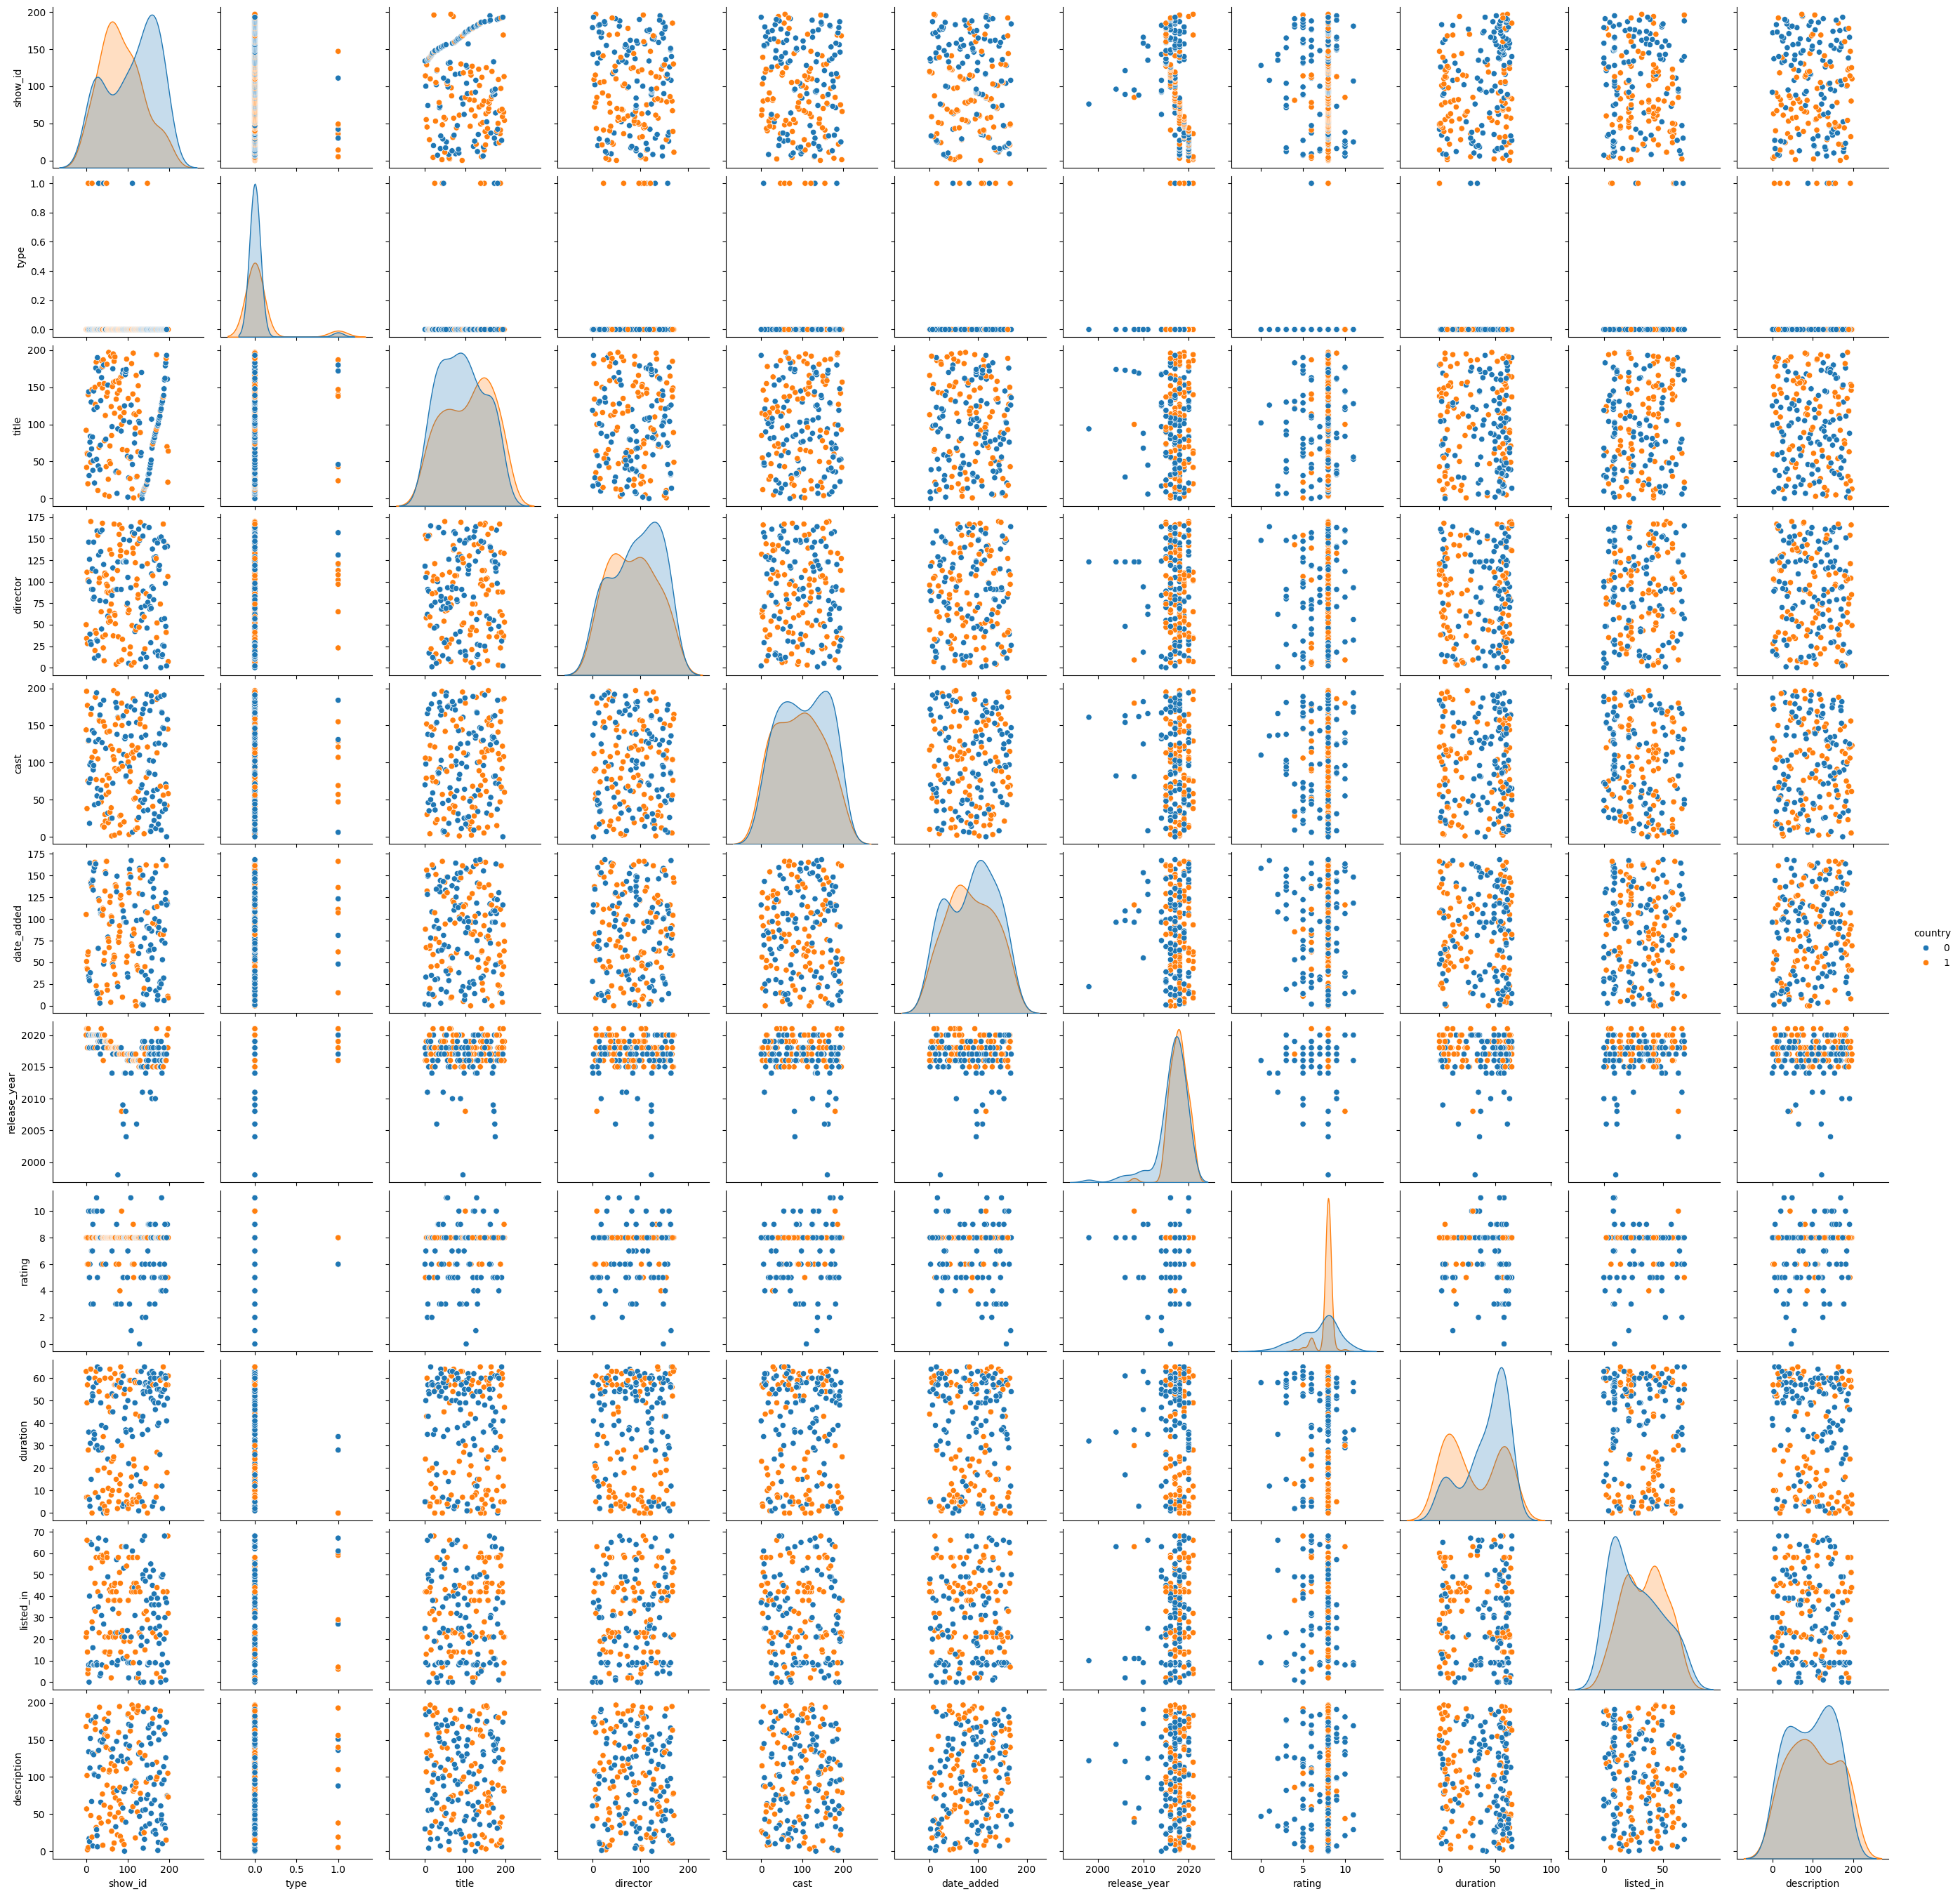

In [191]:
sns.pairplot(train_data_encoded, hue='country')

Количество уникальных режиссеров для каждой страны:

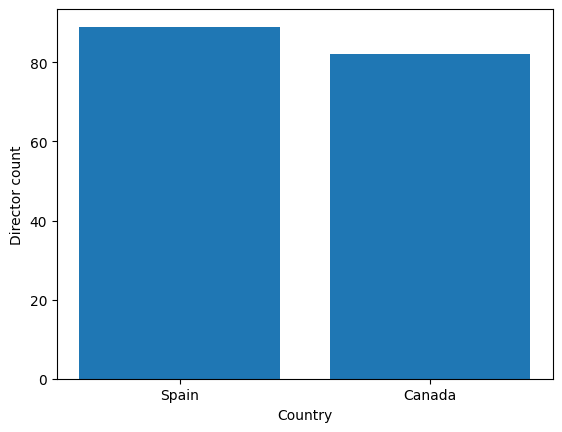

In [192]:
x_countries = np.arange(len(top_countries))
y_directors = train_data.groupby('country')['director'].nunique()

plt.bar(x_countries, y_directors)
plt.xticks(x_countries, top_countries)
plt.xlabel('Country')
plt.ylabel('Director count')
plt.show()

Рейтинг режисеров по количеству фильмов

<Axes: ylabel='director'>

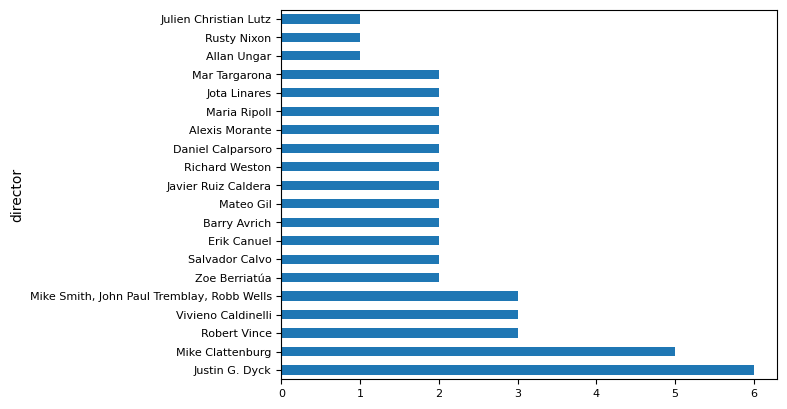

In [193]:
train_data['director'].value_counts().head(20).plot(kind='barh', fontsize=8)

# 3. Корреляционный анализ данных

<Axes: title={'center': 'Heatmap корреляции'}>

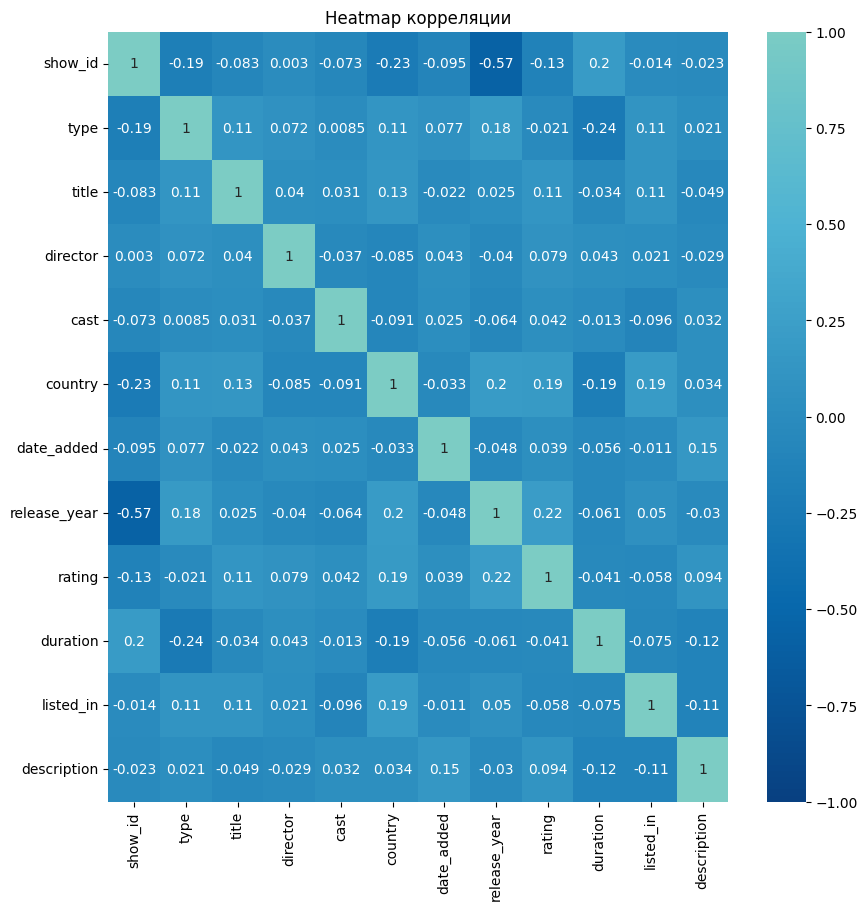

In [194]:
correlation = train_data_encoded.corr(method='spearman')
plt.figure(figsize=(10, 10))
plt.title('Heatmap корреляции')
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap="GnBu_r", center=1)

Проверим связь между годом выпуска и рейтингом

<Axes: title={'center': 'Корреляция между годом выпуска и рейтингом'}, xlabel='rating', ylabel='release_year'>

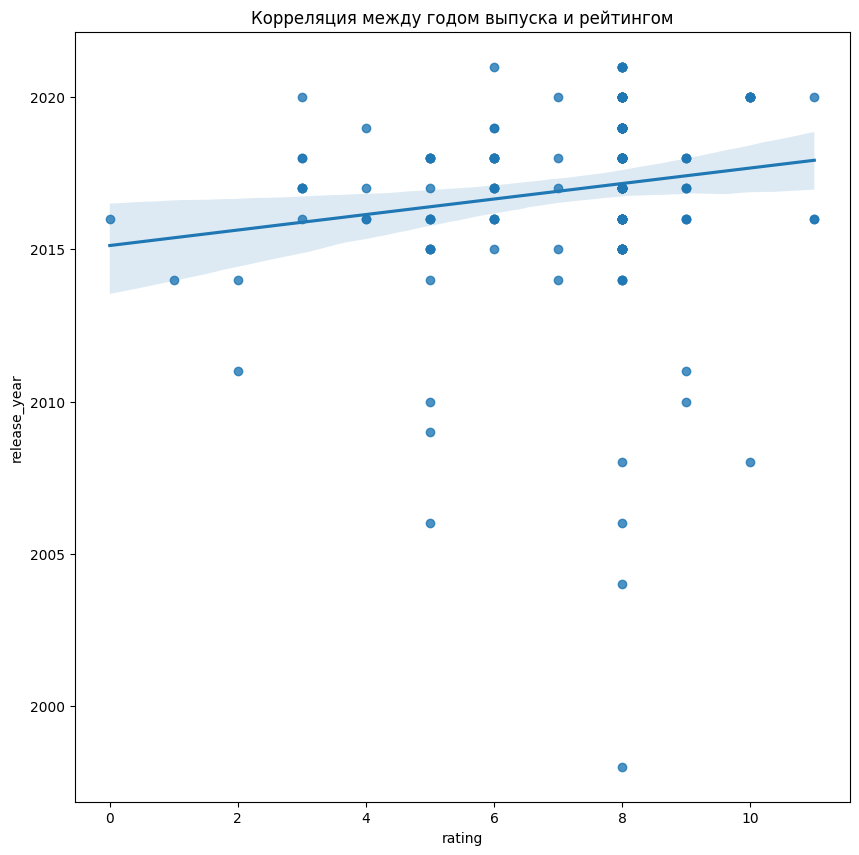

In [195]:
fig=plt.subplots(figsize=(10,10))
plt.title('Корреляция между годом выпуска и рейтингом')
sns.regplot(x='rating', y='release_year', data=train_data_encoded)

<Axes: title={'center': 'Корреляция между годом выпуска и страной'}, xlabel='country', ylabel='release_year'>

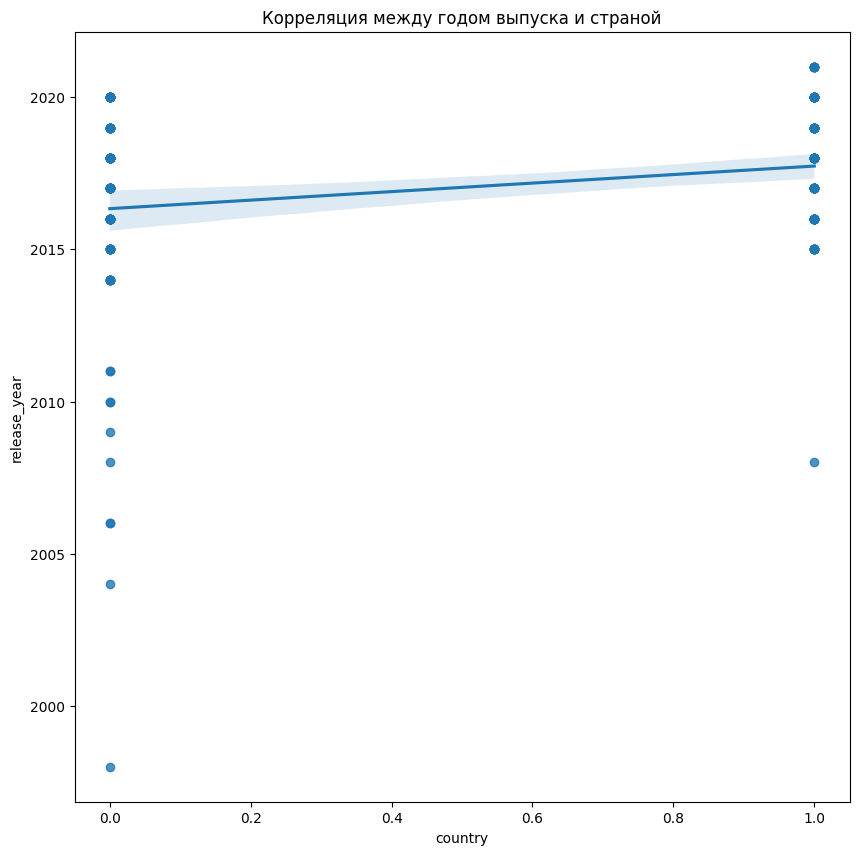

In [196]:
fig=plt.subplots(figsize=(10,10))
plt.title('Корреляция между годом выпуска и страной')
sns.regplot(x='country', y='release_year', data=train_data_encoded)

# 4. Метрики для оценки качества моделей

In [197]:
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    roc_auc_value=roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area=%0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [198]:
class MetricLogger:
    def __init__(self):
        self.df = pd.DataFrame({'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})
        
    def add(self, metric, alg, value):
        self.df = self.df.drop(self.df[(self.df['metric'] == metric) & (self.df['alg'] == alg)].index)
        self.df.loc[len(self.df)] = [metric, alg, value]

    def get_data_for_metric(self, metric, ascending=True):
        temp_data = self.df[self.df['metric'] == metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5,5)):
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric, align='center', height=0.5, tick_label=array_labels)
        ax1.set_title(str_header)
        for a, b in zip(pos, array_metric):
            plt.text(0.5, a - 0.05, str(round(b,3)), color='white')
        plt.show()

In [199]:
metricLogger = MetricLogger()

In [200]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test,y_pred)
    recall = recall_score(Y_test, y_pred)

    print('*' * 80)
    print(model)
    print('*' * 80)

    print('precision: ', precision)
    print('recall: ', recall)
    print('accuracy: ', accuracy)
    print('roc_auc: ', roc_auc)

    print('*' * 80)

    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('accuracy', model_name, accuracy)
    metricLogger.add('roc_auc', model_name, roc_auc)

    draw_roc_curve(Y_test, y_pred)

    plt.show()

# 5. Формирование обучающей и тестовой выборок

In [201]:
train_data_encoded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
157,9,0,76,39,97,0,164,2018,6,3,65,112
276,36,1,186,65,47,1,15,2021,8,28,59,38
701,157,0,107,109,14,0,86,2019,8,62,36,64
765,169,0,194,35,185,1,93,2021,8,12,4,120
899,194,0,70,142,42,1,120,2020,8,18,42,75


Разделим выборки:

In [202]:
X = train_data_encoded.drop('country', axis=1)
Y = train_data_encoded['country']

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(148, 11), (50, 11)
(148,), (50,)


# 6. Построение базового решения

In [204]:
models = {'KNN_3': KNeighborsClassifier(n_neighbors=3),
        'SVC': SVC(),
        'Tree': DecisionTreeClassifier(),
        'RF': RandomForestClassifier(),
        'GB': GradientBoostingClassifier()}

********************************************************************************
KNeighborsClassifier(n_neighbors=3)
********************************************************************************
precision:  0.47619047619047616
recall:  0.45454545454545453
accuracy:  0.54
roc_auc:  0.5308441558441559
********************************************************************************


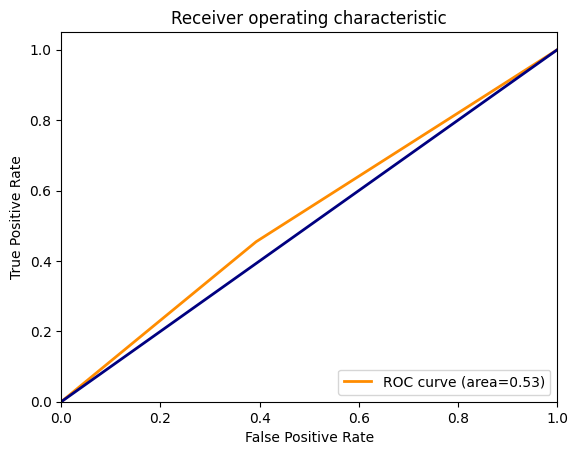

********************************************************************************
SVC()
********************************************************************************
precision:  0.0
recall:  0.0
accuracy:  0.56
roc_auc:  0.5
********************************************************************************


/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


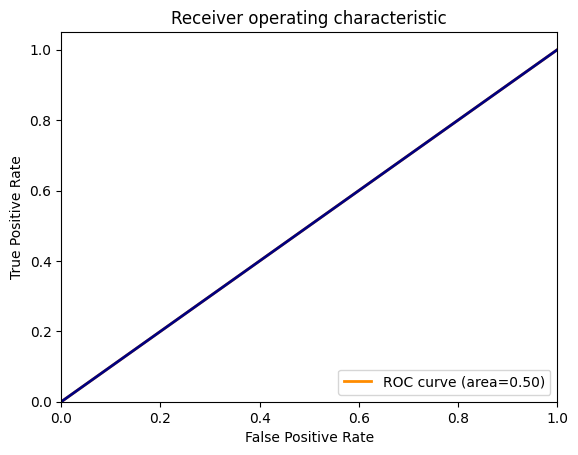

********************************************************************************
DecisionTreeClassifier()
********************************************************************************
precision:  0.6
recall:  0.5454545454545454
accuracy:  0.64
roc_auc:  0.6298701298701299
********************************************************************************


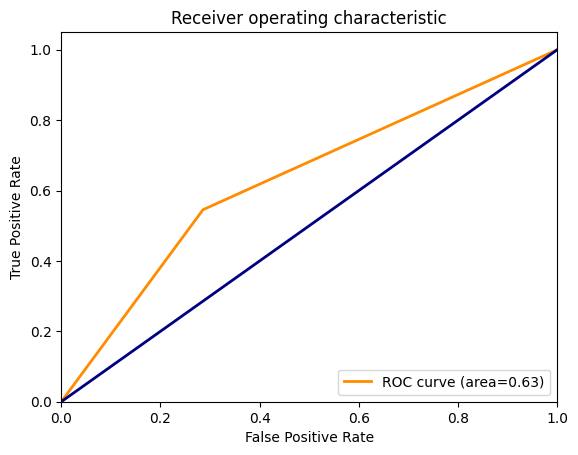

********************************************************************************
RandomForestClassifier()
********************************************************************************
precision:  0.7272727272727273
recall:  0.7272727272727273
accuracy:  0.76
roc_auc:  0.7564935064935066
********************************************************************************


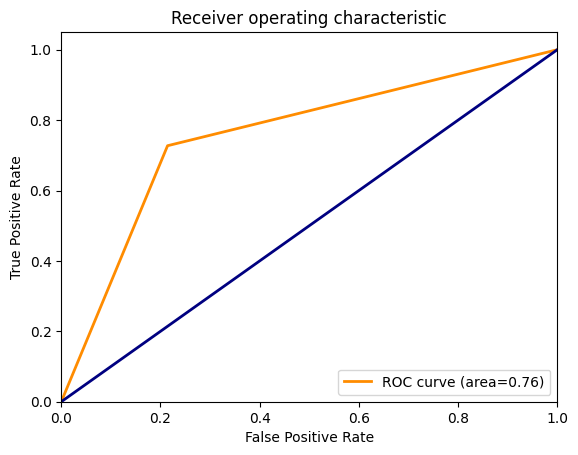

********************************************************************************
GradientBoostingClassifier()
********************************************************************************
precision:  0.7142857142857143
recall:  0.6818181818181818
accuracy:  0.74
roc_auc:  0.7337662337662336
********************************************************************************


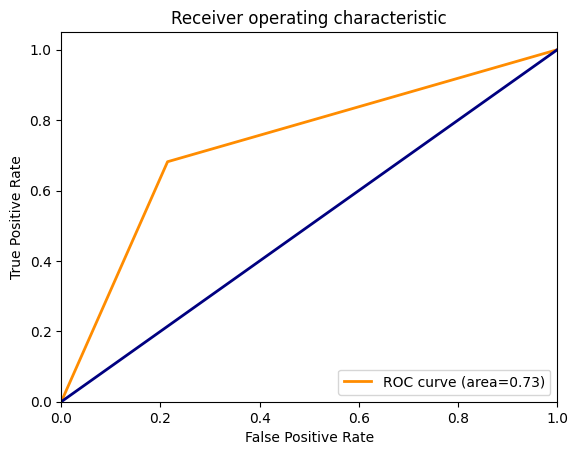

In [205]:
for model_name, model in models.items():
    test_model(model_name, model, metricLogger)

# 7. Подбор гипер-параметров

In [206]:
X_train.shape

(148, 11)

### Дерево решений

In [207]:
%%time
tree_parameters = {'max_depth': randint(1, 100)}
clf_gs = RandomizedSearchCV(DecisionTreeClassifier(), tree_parameters, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10)
clf_gs.fit(X,Y)

CPU times: user 70 ms, sys: 14.7 ms, total: 84.7 ms
Wall time: 467 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x344fb32d0>},
                   scoring='accuracy')

In [208]:
clf_gs.best_estimator_

DecisionTreeClassifier(max_depth=48)

Лучшее значение параметров:

In [209]:
clf_gs.best_params_

{'max_depth': 48}

Средний результат

In [210]:
clf_gs.cv_results_['mean_test_score']

array([0.54371795, 0.56358974, 0.56884615, 0.57371795, 0.53602564,
       0.55371795, 0.55371795, 0.56871795, 0.56871795, 0.56384615])

### Градиентный бустинг

In [211]:
param_dist = {'learning_rate': [1e-3, 1e-2, 1e-1], 
              'subsample': np.linspace(0, 0.9, 10),
              'n_estimators': randint(1, 100), 
              'max_depth': randint(1, 10)}

gb = GradientBoostingRegressor()

random_search = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=100)
random_search.fit(X_train, Y_train)

/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sk

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x34b8879d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x34b766910>,
                                        'subsample': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [212]:
random_search.best_estimator_

GradientBoostingRegressor(max_depth=8, n_estimators=75,
                          subsample=0.6000000000000001)

Лучшие значения параметров

In [213]:
random_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 75,
 'subsample': 0.6000000000000001}

Средний результат:

In [214]:
random_search.cv_results_['mean_test_score']

array([-0.07954464,         nan,         nan,  0.16480227,  0.17003673,
        0.26848776,  0.27721166,  0.01697209, -0.10610514,         nan,
        0.03814377,  0.21272493,  0.24998034,  0.02950199,  0.09522657,
       -0.11679314, -0.00342092, -0.04632189,  0.03266667,  0.2525476 ,
       -0.12975299, -0.03244206, -0.09071094, -0.00181263,  0.19720064,
       -0.10824143, -0.13159236,  0.07005755, -0.01992744,         nan,
       -0.07719346,  0.06773184, -0.06380076,  0.2387444 , -0.11548067,
       -0.11514203, -0.11077489, -0.09348205, -0.13111448, -0.07401652,
        0.03085807, -0.12118655,  0.16629971,  0.18878959, -0.05086672,
       -0.11475448, -0.12526445,  0.0432603 ,  0.08741898,  0.26473015,
        0.16885498, -0.00883629,  0.16200487, -0.0823413 , -0.0495628 ,
       -0.01090447,  0.26350818, -0.11016454, -0.06386411,         nan,
       -0.12808452,  0.26478619, -0.08544384, -0.07197784,  0.21864872,
        0.22091933, -0.10123217,  0.28165398, -0.10413169,  0.11

# 8. Сравнение качества полученных моделей с качеством baseline-моделей

### Дерево решений

********************************************************************************
DecisionTreeClassifier()
********************************************************************************
precision:  0.6
recall:  0.5454545454545454
accuracy:  0.64
roc_auc:  0.6298701298701299
********************************************************************************


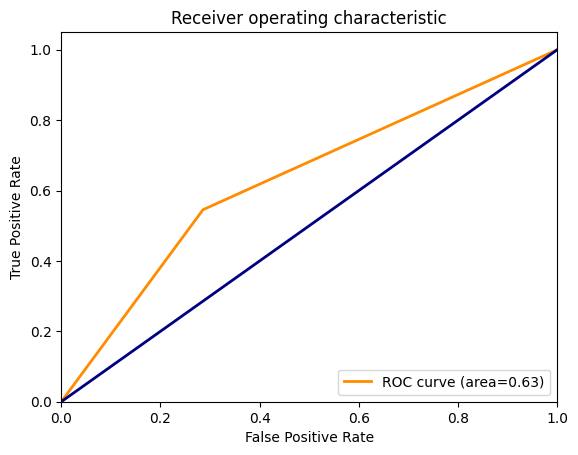

In [215]:
test_model('Tree', DecisionTreeClassifier(), metricLogger)

********************************************************************************
RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x344fb32d0>},
                   scoring='accuracy')
********************************************************************************
precision:  0.5833333333333334
recall:  0.6363636363636364
accuracy:  0.64
roc_auc:  0.6396103896103895
********************************************************************************


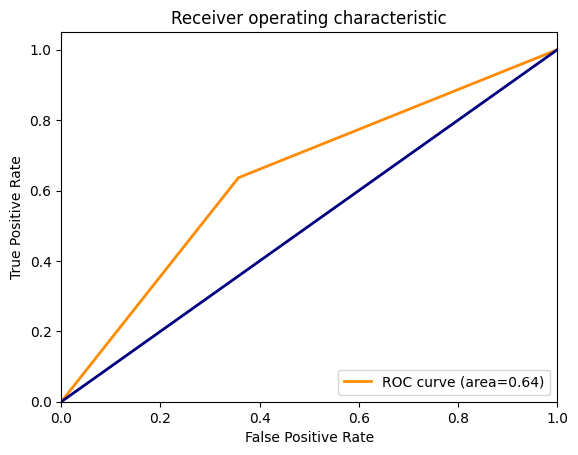

In [216]:
test_model('Tree_tuned', RandomizedSearchCV(DecisionTreeClassifier(), tree_parameters, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10), metricLogger)

### Градиентный бустинг

********************************************************************************
GradientBoostingClassifier()
********************************************************************************
precision:  0.7142857142857143
recall:  0.6818181818181818
accuracy:  0.74
roc_auc:  0.7337662337662336
********************************************************************************


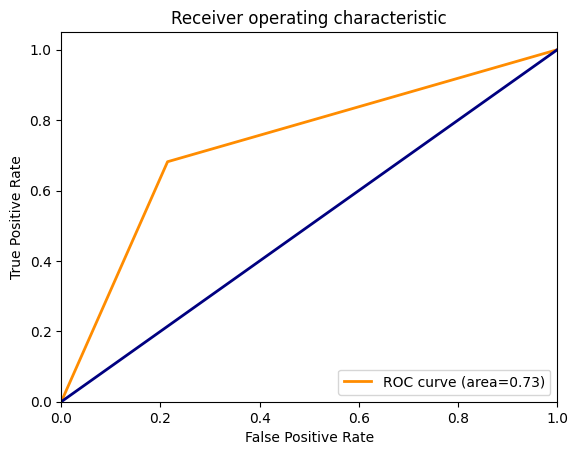

In [217]:
test_model('GB', GradientBoostingClassifier(), metricLogger)

/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/tayushiev/Documents/Проекты/ML_TMO/venv/lib/python3.11/site-packages/sklea

********************************************************************************
RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x34b8879d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x34b766910>,
                                        'subsample': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy')
********************************************************************************
precision:  0.7083333333333334
recall:  0.7727272727272727
accuracy:  0.76
roc_auc:  0.7613636363636364
********************************************************************************


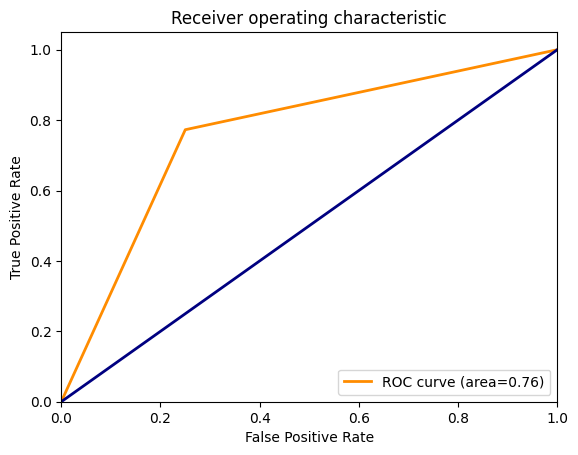

In [218]:
test_model('GB_tuned', RandomizedSearchCV(GradientBoostingClassifier(), param_dist, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10), metricLogger)

# 9. Выводы о качестве построенных моделей


In [219]:
metrics = ['precision', 'recall', 'accuracy', 'roc_auc']
metrics

['precision', 'recall', 'accuracy', 'roc_auc']

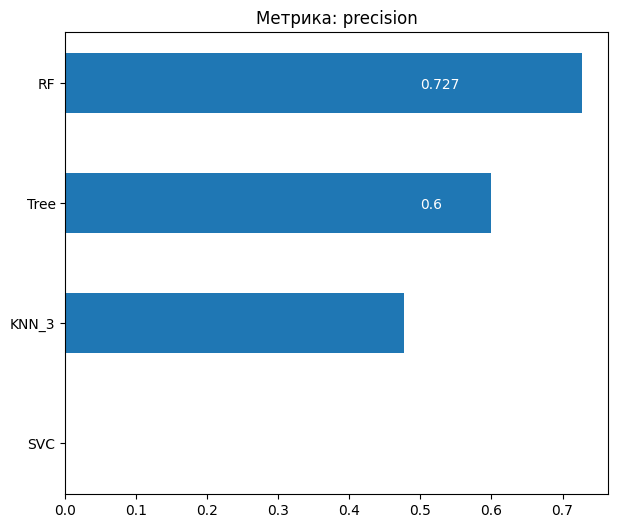

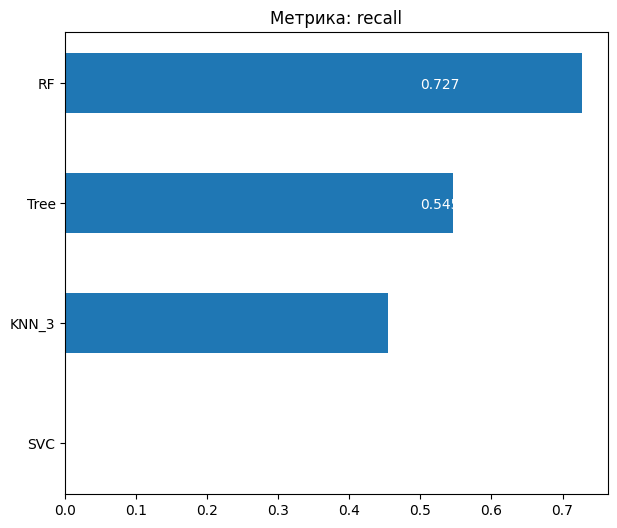

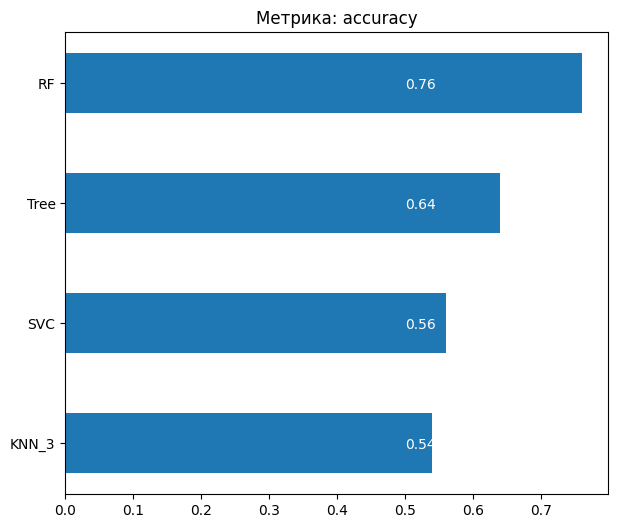

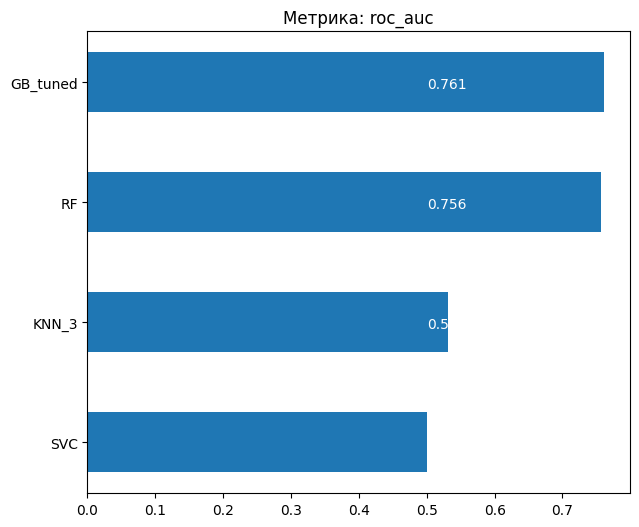

In [220]:
for metric in metrics:
    metricLogger.plot('Метрика: ' + metric, metric, figsize=(7,6))

# Вывод

Было использовано 5 моделей, для двух из них был проведен подбор гиперпараметров - дерево решений и градиентный бустинг. Лучше всего показали себя модели: метод случайного леса и дерево решений. Худший результат показали модели KNN и SVC с точностью в 0.5. В результате подбора гиперпараметров изменения остались незначительными.

# Заключение

В данном НИРе мы выполнили типовую задачу машинного обучения. Провели анализ данных, преобразовали готовый датасет под наши потребности, подобрали модели, а также подобрали наиболее подходящие гиперпараметры.

В нашем случае классификатор на модели случайного леса показал наилучший результат. В ходе подбора гиперпараметров результаты оказались приблизительно одинаковыми.

В данном проекте были закреплены все знания, полученные в курсе лекций и на лабораторных работах. Часть информации была найдена в различных открытых источниках в интернете.
